In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
# import seaborn as sns

import xml.etree.ElementTree as ET
from PIL import Image


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.utils import to_categorical
import cv2

In [2]:
# breed_list = os.listdir('/Users/awnishranjan/Developer/currentproject/notebook/data/Annotation/') 

# fig = plt.figure(figsize=(15,8))
# for i in range(15):
#     axs = fig.add_subplot(3,5,i+1)
#     breed = np.random.choice(breed_list)
#     dog = np.random.choice(os.listdir('/Users/awnishranjan/Developer/currentproject/notebook/data/Annotation/' + breed)) # random image 
#     img = Image.open('/Users/awnishranjan/Developer/currentproject/notebook/data/Images/' + breed + '/' + dog + '.jpg') 
#     tree = ET.parse('/Users/awnishranjan/Developer/currentproject/notebook/data/Annotation/' + breed + '/' + dog) # init parser for file given
#     root = tree.getroot() 
#     object_1 = root.findall('object')[0]
#     name = object_1.find('name').text
#     axs.set_title(name)
#     plt.imshow(img)
#     plt.axis('off')

# plt.suptitle("Sample Dog Images")
# plt.show()

In [3]:
breed_list = os.listdir('/Users/awnishranjan/Developer/currentproject/notebook/data/Annotation/') 
breed_list.sort()

In [4]:
len(breed_list)

121

In [5]:
# (venv) awnishranjan@Awnishs-MacBook-Air currentproject % python -m src.pipelines.training_pipeline 
# artifacts/train_images artifacts/test_images
# n02097658-silky_terrier
# (venv) awnishranjan@Awnishs-MacBook-Air currentproject % 


In [6]:
label2index = dict((name, index) for index, name in enumerate(breed_list))
index2label = dict((index, name) for index, name in enumerate(breed_list))

In [7]:
# label2index

In [8]:

images = []
annotations = []

for breed in breed_list:
    image_directory = '/Users/awnishranjan/Developer/currentproject/notebook/data/Images/' + breed
    
    # Check if the directory exists
    if not os.path.isdir(image_directory):
        continue
    
    image_files = os.listdir(image_directory)
    
    # Filter out .DS_Store file if present
    image_files = [f for f in image_files if not f.startswith('.')]
    
    image_files.sort()
    images.extend([os.path.join(image_directory, f) for f in image_files])
    annotations.extend([os.path.join('/Users/awnishranjan/Developer/currentproject/notebook/data/Annotation/'+ breed, f.replace(".jpg", ".xml")) for f in image_files])


In [9]:
for idx, ann in enumerate(annotations):
    # Split the annotation file path by the '/' separator
    parts = ann.split("/")
    # Extract the dog breed name from the directory structure
    breed_name = parts[-2].split("-")[1]  # Assuming the breed name is after the hyphen in the second-to-last directory name
    # Extract the filename from the last part of the path
    filename = parts[-1].replace(".xml", "")
    # Append the breed name to the filename
    annotations[idx] = breed_name + "_" + filename

In [10]:
len(annotations)
# len(images)

20580

In [11]:
annotations[0]

'Chihuahua_n02085620_10074'

In [12]:
# Prepare train test validate datasets
Xs = np.asarray(images)
Ys = np.asarray(annotations)

In [13]:
Ys

array(['Chihuahua_n02085620_10074', 'Chihuahua_n02085620_10131',
       'Chihuahua_n02085620_10621', ...,
       'African_hunting_dog_n02116738_9829',
       'African_hunting_dog_n02116738_9844',
       'African_hunting_dog_n02116738_9924'], dtype='<U46')

In [14]:
# plt.imread(Xs[4]).shape


In [15]:
print('Xs shape',Xs.shape)
print(Xs[1995:20011])
print('Ys shape',Ys.shape)
print(Ys[:5])


Xs shape (20580,)
['/Users/awnishranjan/Developer/currentproject/notebook/data/Images/n02088238-basset/n02088238_1454.jpg'
 '/Users/awnishranjan/Developer/currentproject/notebook/data/Images/n02088238-basset/n02088238_1731.jpg'
 '/Users/awnishranjan/Developer/currentproject/notebook/data/Images/n02088238-basset/n02088238_1944.jpg'
 ...
 '/Users/awnishranjan/Developer/currentproject/notebook/data/Images/n02113978-Mexican_hairless/n02113978_2261.jpg'
 '/Users/awnishranjan/Developer/currentproject/notebook/data/Images/n02113978-Mexican_hairless/n02113978_2276.jpg'
 '/Users/awnishranjan/Developer/currentproject/notebook/data/Images/n02113978-Mexican_hairless/n02113978_2286.jpg']
Ys shape (20580,)
['Chihuahua_n02085620_10074' 'Chihuahua_n02085620_10131'
 'Chihuahua_n02085620_10621' 'Chihuahua_n02085620_1073'
 'Chihuahua_n02085620_10976']


In [16]:
X_train ,X_test ,y_train, y_test = train_test_split(Xs,Ys,test_size=0.1)

In [17]:
y_train

array(['Irish_wolfhound_n02090721_2361',
       'German_shepherd_n02106662_21094', 'toy_poodle_n02113624_836', ...,
       'Sussex_spaniel_n02102480_142', 'English_foxhound_n02089973_846',
       'Gordon_setter_n02101006_296'], dtype='<U46')

In [18]:
len(breed_list)

121

In [19]:
# constants :::: and split ::::::
validation_percent = 0.2
image_width = 128
image_height = 128
num_channels = 3
num_classes = len(breed_list)
# epochs = 30
train_batch_size = 32
validation_batch_size = 32
test_batch_size = 32
train_shuffle_size = train_batch_size * 3
validation_shuffle_size = validation_batch_size * 3

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train, test_size=validation_percent) 



In [20]:
X_train.shape

(14817,)

In [21]:
label2index

{'.DS_Store': 0,
 'n02085620-Chihuahua': 1,
 'n02085782-Japanese_spaniel': 2,
 'n02085936-Maltese_dog': 3,
 'n02086079-Pekinese': 4,
 'n02086240-Shih-Tzu': 5,
 'n02086646-Blenheim_spaniel': 6,
 'n02086910-papillon': 7,
 'n02087046-toy_terrier': 8,
 'n02087394-Rhodesian_ridgeback': 9,
 'n02088094-Afghan_hound': 10,
 'n02088238-basset': 11,
 'n02088364-beagle': 12,
 'n02088466-bloodhound': 13,
 'n02088632-bluetick': 14,
 'n02089078-black-and-tan_coonhound': 15,
 'n02089867-Walker_hound': 16,
 'n02089973-English_foxhound': 17,
 'n02090379-redbone': 18,
 'n02090622-borzoi': 19,
 'n02090721-Irish_wolfhound': 20,
 'n02091032-Italian_greyhound': 21,
 'n02091134-whippet': 22,
 'n02091244-Ibizan_hound': 23,
 'n02091467-Norwegian_elkhound': 24,
 'n02091635-otterhound': 25,
 'n02091831-Saluki': 26,
 'n02092002-Scottish_deerhound': 27,
 'n02092339-Weimaraner': 28,
 'n02093256-Staffordshire_bullterrier': 29,
 'n02093428-American_Staffordshire_terrier': 30,
 'n02093647-Bedlington_terrier': 31,
 'n02

In [22]:
y_train[0]

'Greater_Swiss_Mountain_dog_n02107574_1669'

In [23]:
print(label2index.get(100,-1))

-1


In [24]:
# Initialize an empty label2index dictionary
label2index = {}

# Extract breed names from the labels and populate label2index with label-index mappings
unique_labels = np.unique([label.split('_')[0] for label in y_train])
for index, label in enumerate(unique_labels):
    label2index[label] = index
default_index = -1
# Convert dataset labels to numerical indices
train_processed_y = np.asarray([label2index.get(label.split('_')[0], default_index) for label in y_train])
# validate_processed_y = np.asarray([label2index.get(label.split('_')[0], default_index) for label in y_valid])
test_processed_y = np.asarray([label2index.get(label.split('_')[0], default_index) for label in y_test])


In [25]:
train_processed_y

array([26, 54, 33, ...,  8, 87, 90])

In [26]:
# # to_array :::::
# default_index = -1
# train_processed_y = np.asarray([label2index.get(label, default_index) for label in y_train])
# validate_processed_y = np.asarray([label2index.get(label, default_index) for label in y_valid])
# test_processed_y = np.asarray([label2index.get(label, default_index) for label in y_test])


In [27]:
y_test

array(['English_setter_n02100735_10030', 'vizsla_n02100583_7122',
       'Afghan_hound_n02088094_3075', ..., 'Eskimo_dog_n02109961_1032',
       'Pembroke_n02113023_3687', 'Irish_wolfhound_n02090721_2461'],
      dtype='<U46')

In [28]:
train_processed_y.shape

(14817,)

In [29]:
# encode it onehot encoding :::::   

train_processed_y = to_categorical(train_processed_y, num_classes=num_classes)
# validate_processed_y = to_categorical(validate_processed_y, num_classes=num_classes)
test_processed_y = to_categorical(test_processed_y, num_classes=num_classes)

In [30]:
train_processed_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [31]:
import json

In [32]:
# utils 
class JsonEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, decimal.Decimal):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(JsonEncoder, self).default(obj)
        
def get_model_metrics():
    with open("./SavedModels/model_metrics.json") as json_file:
        model_metrics = json.load(json_file)
    return model_metrics

        

def save_model(model, path="./SavedModels", model_name="Inception_ResNetv2"):
    filename = os.path.join(path, model_name + ".keras")
    model.save(filename)

def save_model_metrics(model_name="model_1", metrics={}):
    model_metrics_path = "./SavedModels/model_metrics.json"

    os.makedirs(os.path.dirname(model_metrics_path), exist_ok=True)

    # Load existing metrics if the file exists
    if os.path.exists(model_metrics_path):
        with open(model_metrics_path, "r") as json_file:
            model_metrics = json.load(json_file)
    else:
        model_metrics = {}

    # Update or add metrics for the current model
    model_metrics[model_name] = metrics

    # Save the metrics to the JSON file
    with open(model_metrics_path, "w") as json_file:
        json.dump(model_metrics, json_file, cls=JsonEncoder)


def get_model_size(path="./SavedModels", model_name="Inception_ResNetv2"):
    model_file = os.path.join(path, model_name + ".h5")  # Adjust the extension if necessary
    if os.path.exists(model_file):
        model_size = os.stat(model_file).st_size
        return model_size
    else:
        print(f"Model file {model_file} not found.")
        return None  # or any default value as needed


def evaluate_save_model(model,training_results,test_data,execution_time, learning_rate, batch_size, epochs, optimizer,momentum = None, save=True):
    
    # Get the model train history
    model_train_history = training_results.history
    # Get the number of epochs the training was run for
    num_epochs = len(model_train_history["loss"])

    # Plot training results
    fig = plt.figure(figsize=(15,5))
    axs = fig.add_subplot(1,2,1)
    axs.set_title('Loss')
    # Plot all metrics
    for metric in ["loss","val_loss"]:
        axs.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
    axs.legend()
    
    axs = fig.add_subplot(1,2,2)
    axs.set_title('Accuracy')
    # Plot all metrics
    for metric in ["accuracy","val_accuracy"]:
        axs.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
    axs.legend()

    plt.show()
    
    # Evaluate on test data
    evaluation_results = model.evaluate(test_data)
    print('Evaluation results: [loss, accuracy]', evaluation_results)
    
    if save:
        # Save model
        save_model(model , model_name=model.name)
        model_size = get_model_size(model_name=model.name)

        # Save model history
        with open(os.path.join("./SavedModels",model.name+"_train_history.json"), "w") as json_file:
            json_file.write(json.dumps(model_train_history,cls=JsonEncoder))

        trainable_parameters = model.count_params()

        # Save model metrics
        metrics ={
            "trainable_parameters":trainable_parameters,
            "execution_time":execution_time,
            "loss":evaluation_results[0],
            "accuracy":evaluation_results[1],
            "model_size":model_size,
            "learning_rate":learning_rate,
            "batch_size":batch_size,
            'momentum': momentum,
            "epochs":epochs,
            "optimizer":type(optimizer).__name__
        }
        save_model_metrics(model_name=model.name,metrics=metrics)

In [33]:
train_data_count = X_train.shape[0]
steps_per_epoch = int(train_data_count / train_batch_size)
validation_data_count = X_valid.shape[0]
validation_steps =int(validation_data_count / validation_batch_size)

In [49]:
X_test[1]

'/Users/awnishranjan/Developer/currentproject/notebook/data/Images/n02100583-vizsla/n02100583_7122.jpg'

In [34]:
train_data_count

14817

In [35]:
train_processed_y[121]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [43]:
epochs = 1
# Prepare the data
def load_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=num_channels)
    image = tf.image.resize(image,[image_height,image_width])
    return image, label

# Normalize pixels
def normalize(image, label):
    image = image/255
    return image, label 


AUTOTUNE = tf.data.experimental.AUTOTUNE

def build_data_generators(train_data_process_list=[load_image,normalize],
                          validate_data_process_list=[load_image,normalize],
                          test_data_process_list=[load_image,normalize]):
    train_data = tf.data.Dataset.from_tensor_slices((X_train.tolist(),train_processed_y.tolist()))
    # validation_data = tf.data.Dataset.from_tensor_slices((X_valid.tolist(),validate_processed_y.tolist()))
    test_data  = tf.data.Dataset.from_tensor_slices((X_test.tolist(),test_processed_y.tolist()))

    # Train data 
    train_data = train_data.shuffle(train_data_count)
    for process in train_data_process_list:
        train_data = train_data.map(process, num_parallel_calls=AUTOTUNE)
    
    train_data = train_data.repeat(epochs).batch(train_batch_size)
    

    # valid data 

    # validation_data = validation_data.shuffle(validation_data_count)
    
    
    # for process in validate_data_process_list:
    #     validation_data = validation_data.map(process, num_parallel_calls=AUTOTUNE)
    
    # validation_data = validation_data.repeat(epochs).batch(validation_batch_size)

    # test data 

    for process in test_data_process_list:
        test_data = test_data.map(process, num_parallel_calls=AUTOTUNE)
    test_data = test_data.repeat(1).batch(test_batch_size)

    return train_data, test_data



In [47]:
path

NameError: name 'path' is not defined

In [45]:
train_data,  test_data = build_data_generators()

In [46]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 121), dtype=tf.float32, name=None))>

In [35]:
print("train_data",train_data)
print("validation_data",validation_data)
print("test_data",test_data)

train_data <_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 121), dtype=tf.float32, name=None))>
validation_data <_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 121), dtype=tf.float32, name=None))>
test_data <_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 121), dtype=tf.float32, name=None))>


In [36]:
for images, labels in test_data.take(5):  # Take 5 batches from the train_data dataset
    print(images.shape, labels.shape)
    # Decode one-hot encoded labels to get the actual label
    decoded_labels = [np.argmax(label) for label in labels.numpy()]
    # print(decoded_labels)

(32, 128, 128, 3) (32, 121)
(32, 128, 128, 3) (32, 121)
(32, 128, 128, 3) (32, 121)
(32, 128, 128, 3) (32, 121)
(32, 128, 128, 3) (32, 121)


2024-03-22 19:32:41.130470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Model training 

In [66]:
from keras.layers import Dense, Flatten , Dropout , BatchNormalization , Activation , Input
from keras.models import  Sequential 
from keras.models import Model
from keras.applications import InceptionResNetV2
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras import optimizers
from keras import layers

from keras.optimizers import Adam

In [68]:

inceptionresnetv2 = InceptionResNetV2(include_top=False , input_shape=(128,128,3))
def build_inception_resnet_model(model_name='Inception_ResNetv2', print_summary=True, input_shape=(128,128,3), num_classes=121):
    # Load InceptionResNetV2 model (excluding top classification layer)
    base_model = InceptionResNetV2(include_top=False, input_shape=input_shape, weights='imagenet')

    # Freeze all layers
    for layer in base_model.layers:
        layer.trainable = False

    # Extract output of base model
    x = base_model.output

    # Add custom layers
    x = Flatten()(x)
    x = Dense(units=121, activation='softmax')(x)

    # Create new model
    model = Model(inputs=base_model.input, outputs=x, name=model_name)

    if print_summary:
        print(model.summary())

    return model


In [65]:
# # model_input = inceptionresnetv2.layers[0].input
# model = Sequential()
# model.add(inceptionresnetv2)
# model.add(Flatten())
# model.add(Dense(units=512,activation='relu'))
# model.add(Dense(units=256,activation='relu'))
# model.add(Dense(units=120,activation='softmax'))

In [66]:
# model.summary()

In [69]:
batch_size = 32
epochs = 5

earlystopping = EarlyStopping(monitor='val_accuracy', patience=10)

# Model Checkpoint
checkpoint_filepath = '/Users/awnishranjan/Developer/currentproject/notebook/weights/model_weights.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=2,
    mode='max',
    save_best_only=True)

# Build the model
model = build_inception_resnet_model()
optimizer = optimizers.Adam()

# Compile
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

Model: "Inception_ResNetv2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_203 (Conv2D) │ (None, 63, 63,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │         96 │ conv2d_203[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_203      │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_204 (Conv2D) │ (None, 61, 61,    │      9,216 │ activation_203[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_204[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_204      │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_205 (Conv2D) │ (None, 61, 61,    │     18,432 │ activation_204[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_205[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_205      │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 30, 30,    │          0 │ activation_205[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_206 (Conv2D) │ (None, 30, 30,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_206[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_206      │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_207 (Conv2D) │ (None, 28, 28,    │    138,240 │ activation_206[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_207[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_207      │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 55,080,281 (210.11 MB)

 Trainable params: 743,545 (2.84 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

None


y_

In [70]:
# Train model
import time
start_time = time.time()
training_results = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=3,
        callbacks=[earlystopping,model_checkpoint_callback], 
        verbose=1,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps)
execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)

Epoch 1/3
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.3515 - loss: 11.3447
Epoch 1: val_accuracy improved from -inf to 0.47065, saving model to /Users/awnishranjan/Developer/currentproject/notebook/weights/model_weights.weights.h5
463/463 ━━━━━━━━━━━━━━━━━━━━ 234s 487ms/step - accuracy: 0.3516 - loss: 11.3422 - val_accuracy: 0.4707 - val_loss: 11.2186
Epoch 2/3
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.5444 - loss: 7.9704
Epoch 2: val_accuracy improved from 0.47065 to 0.47147, saving model to /Users/awnishranjan/Developer/currentproject/notebook/weights/model_weights.weights.h5
463/463 ━━━━━━━━━━━━━━━━━━━━ 260s 561ms/step - accuracy: 0.5444 - loss: 7.9712 - val_accuracy: 0.4715 - val_loss: 11.3531
Epoch 3/3
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.5998 - loss: 6.5472
Epoch 3: val_accuracy improved from 0.47147 to 0.49891, saving model to /Users/awnishranjan/Developer/currentproject/notebook/weights/model_weights.weights.h5
463/463 ━━━━━━━━━━━

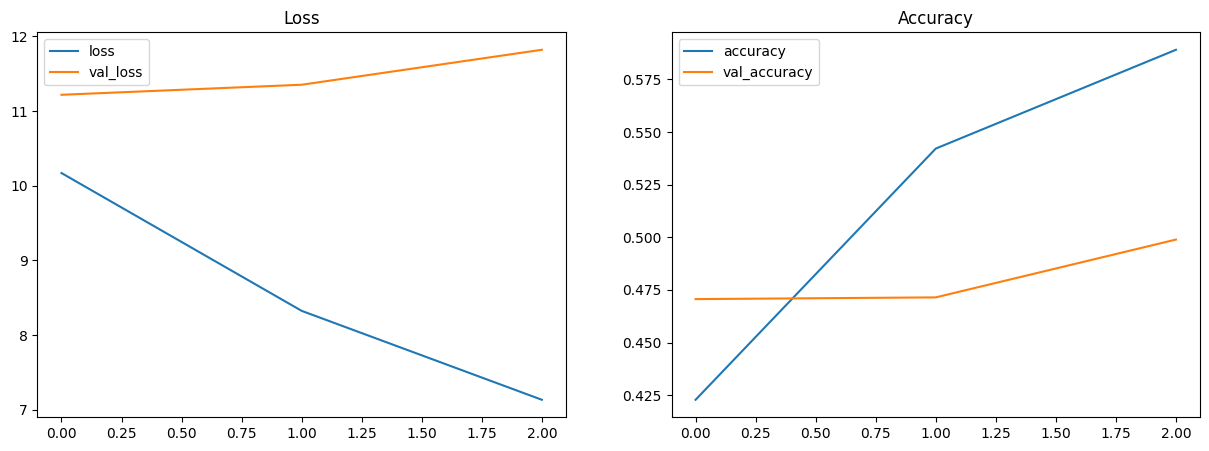

65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 353ms/step - accuracy: 0.4980 - loss: 11.7506
Evaluation results: [loss, accuracy] [11.549070358276367, 0.49854227900505066]
Model file ./SavedModels/Inception_ResNetv2.h5 not found.


In [90]:
learning_rate = 0.001
evaluate_save_model(model,training_results,test_data,execution_time, learning_rate, batch_size, epochs, optimizer)

65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 392ms/step


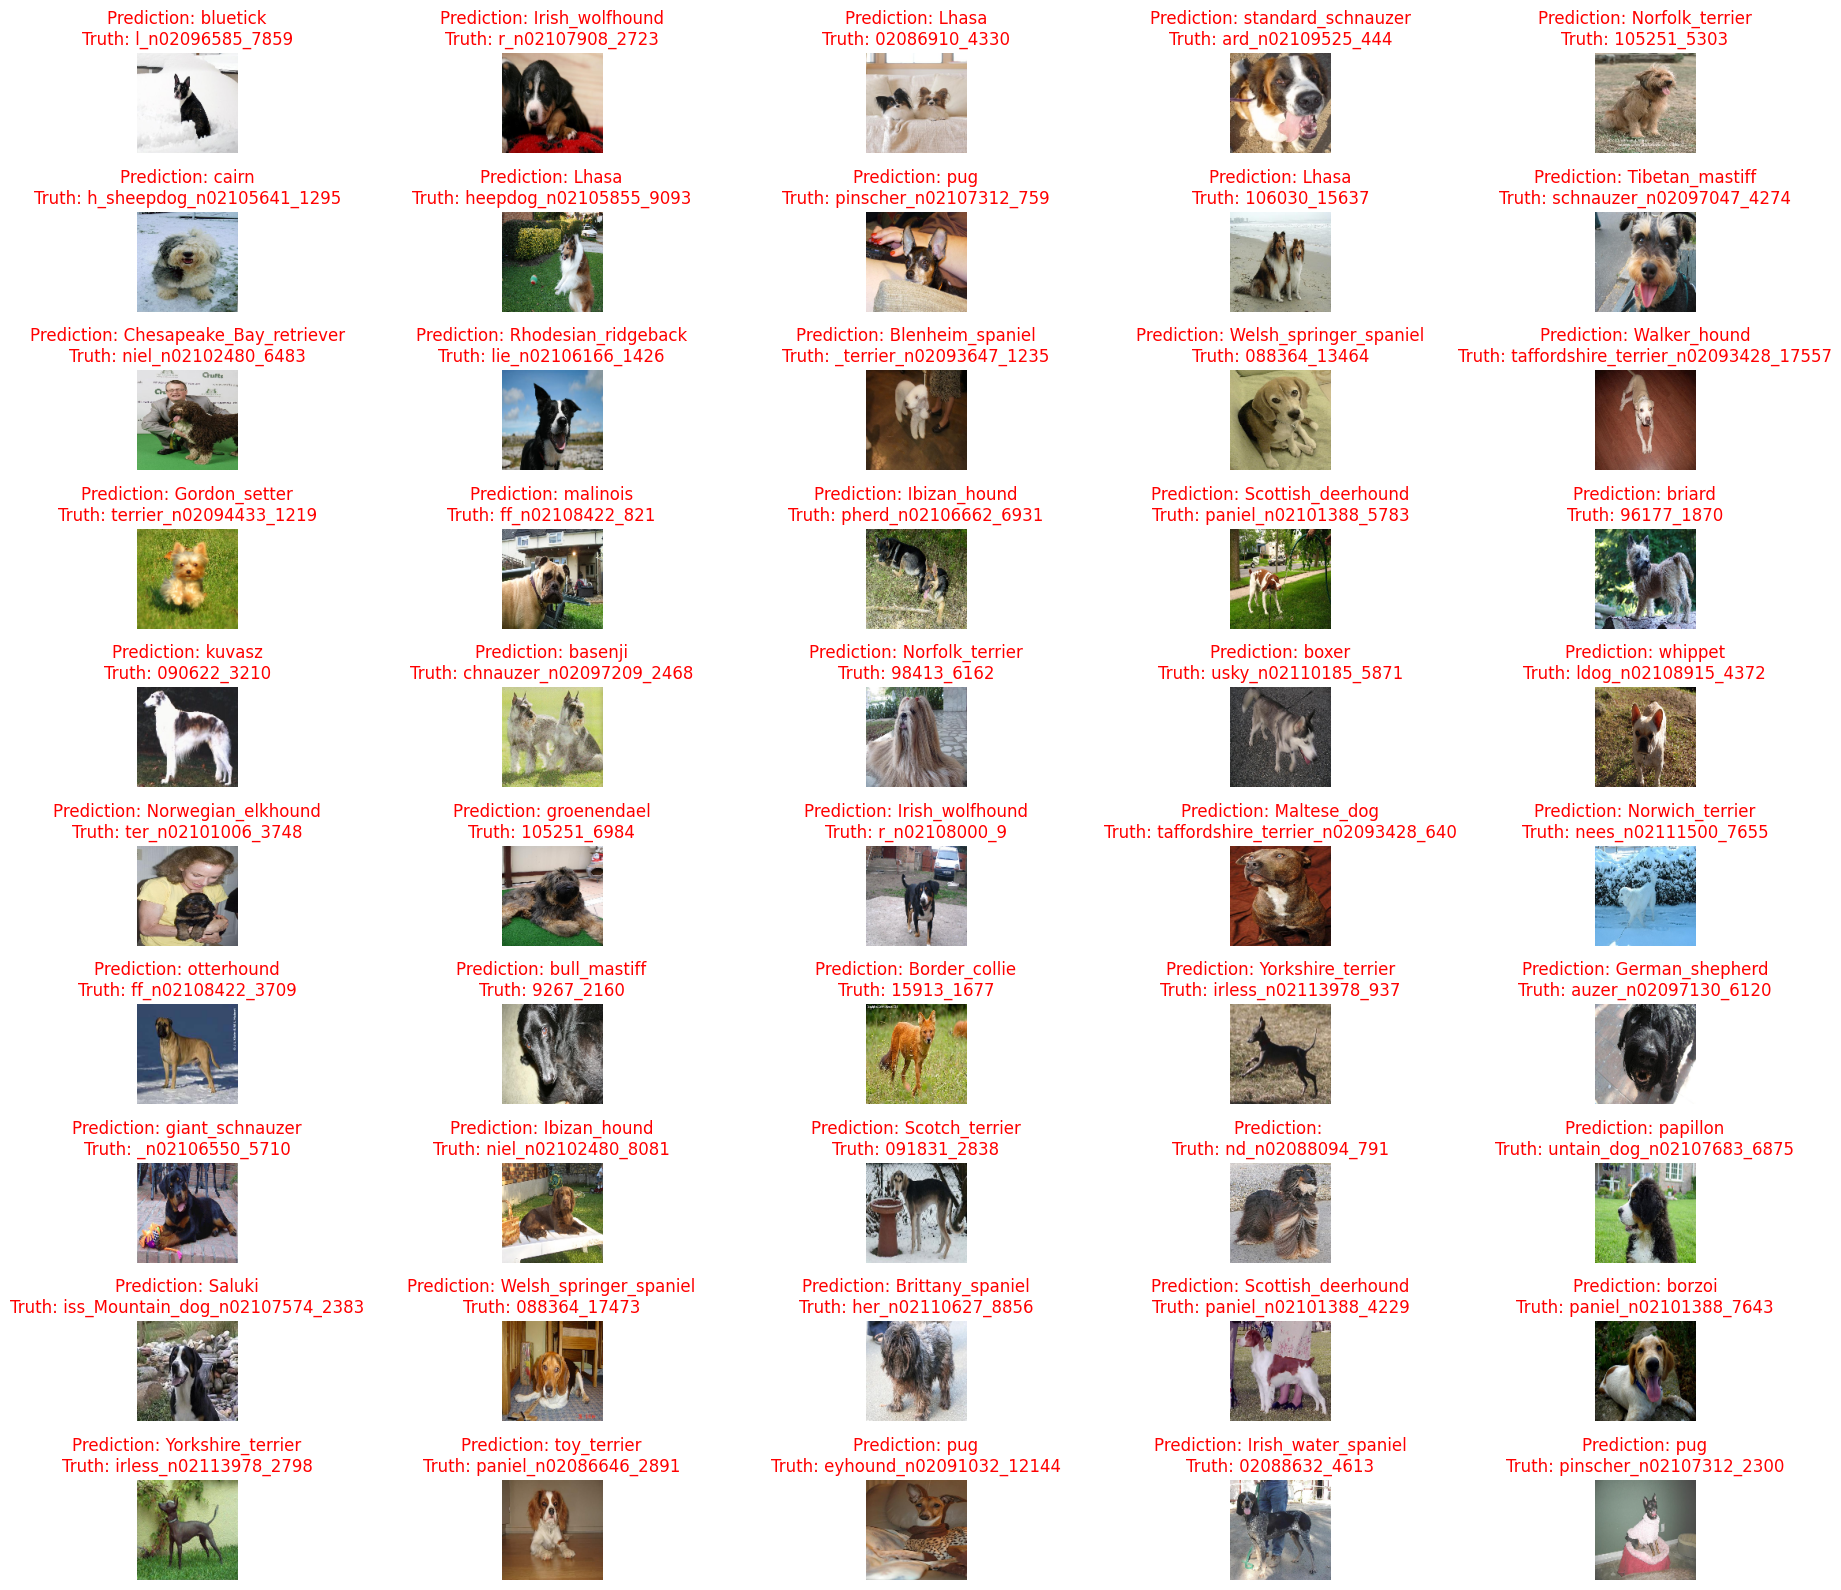

# of true predictions:  0
# of false predictions:  50


In [37]:
prediction_model = tf.keras.models.load_model('/Users/awnishranjan/Developer/currentproject/notebook/SavedModels/Inception_ResNetv2.keras')
test_predictions = prediction_model.predict(test_data)
test_x_display = []
for path in X_test:

    image = cv2.imread(path)
    # convert to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # resize image to a consistent shape
    image = cv2.resize(image, (128,128))  # specify desired dimensions
    # append resized image to the list
    test_x_display.append(image)
# Convert to numpy array
test_x_display = np.asarray(test_x_display)


true_predict = 0
false_predict = 0
fig = plt.figure(figsize=(20,16))
for i,file in enumerate(test_x_display[:50]):
    axs = fig.add_subplot(10,5,i+1)
    axs.set_aspect('equal')
    predicted_breed = index2label[test_predictions.argmax(axis=1)[i]][10:] # [10:] truncates leading unnecessary letters
    true_breed = y_test[i][10:]

    # color code true/false predictions

    if true_breed == predicted_breed:
      axs.set_title('Prediction: ' + predicted_breed + '\n' + 'Truth: ' + true_breed,color='green')
      true_predict += 1
    else:
      axs.set_title('Prediction: ' + predicted_breed + '\n' + 'Truth: ' + true_breed,color='red')
      false_predict += 1
    plt.imshow(test_x_display[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

print('# of true predictions: ', true_predict)
print('# of false predictions: ', false_predict)